# Housing Regression - Sale Price predictiion

## Import Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder

# metrics

from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score, mean_poisson_deviance, mean_gamma_deviance, mean_absolute_percentage_error
# Remove Outliers
from scipy.stats import zscore

# Classifiers
from sklearn.linear_model import LogisticRegression, LinearRegression

## Load Housing Data

In [2]:
# kaggle
# path = "/kaggle/input/house-prices-advanced-regression-techniques/"
# train = pd.read_csv(f"{path}train.csv")
# test = pd.read_csv(f"{path}test.csv")
#local
init_housing = pd.read_csv("../data/regression/train.csv", index_col="Id")
# X_test = pd.read_csv("../data/regression/test.csv")
init_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Data Quality - Pipeline Functions
### Duplicated Rows

In [3]:
def remove_duplicated_rows(df):
    df.copy()
    print('\033[1m' + '  Duplicated rows:  ' + '\033[0m', df.duplicated().sum())
    return df.drop_duplicates()


### Missing Values

In [4]:
def check_for_missing_values(df):
    na_columns = df.columns[df.isnull().any()].to_list()
    print('\033[1m'," Missing values: ".center(40, '#'),'\033[0m',"\n", df[na_columns].isna().sum().apply(lambda x: str(int(x / df.shape[0] * 100)) + "%"))
    return df    

### Remove Outliers

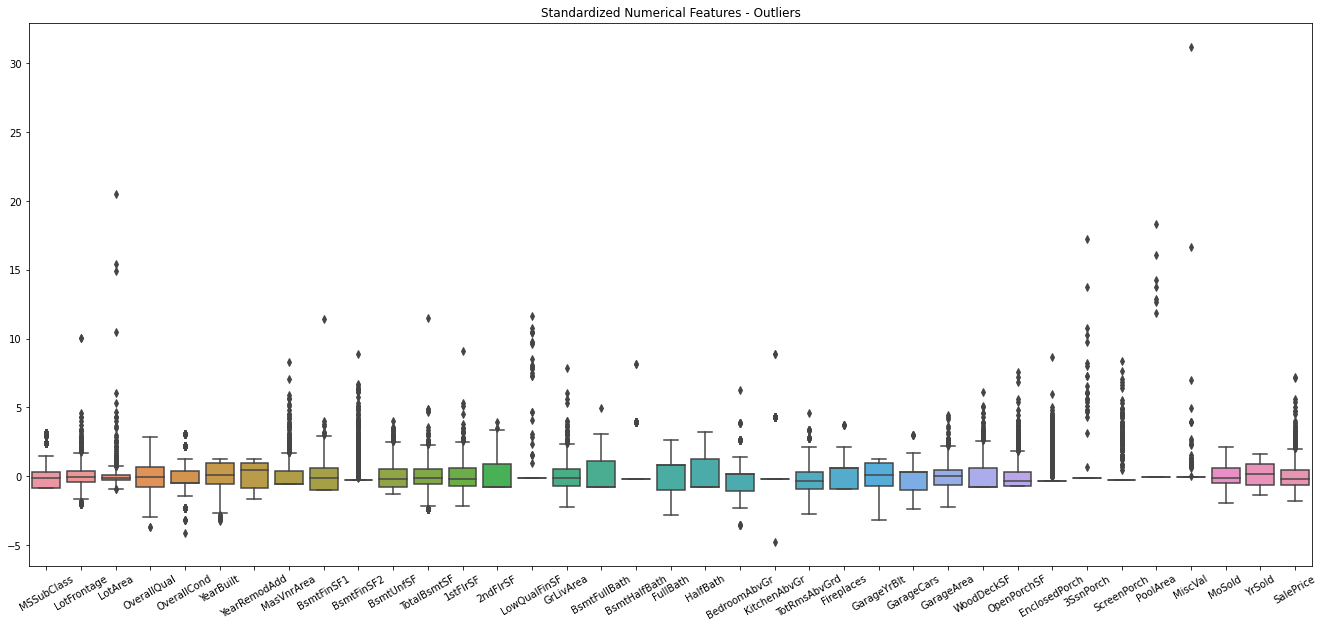

In [5]:
# def remove_outliers(df):
numerical_features = init_housing.select_dtypes(include=["int64", "float64"]).columns.to_list()
columns = init_housing[numerical_features].columns.tolist()
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(init_housing[numerical_features]), columns=columns)
plt.subplots(figsize=(23,10))
ax = sns.boxplot(data=df_std)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title("Standardized Numerical Features - Outliers")
plt.show()


### Drop Columns
All Columns with more or equal to 80 % missing values. 

In [6]:
def drop_columns(df, columns_to_drop = []):
    return df.drop(columns=columns_to_drop).reset_index(drop=True)

### Feature preprocessing
Can you add or combine features? 

In [7]:
def feature_preprocessing(df):
    return df

### Data Quality - Pipeline

In [9]:
housing = (
    init_housing
        .pipe(remove_duplicated_rows)
        .pipe(check_for_missing_values)
        .pipe(drop_columns)
        #.pipe(remove_outliers)
        .pipe(feature_preprocessing)

)
housing

  Duplicated rows:   0
 ########### Missing values: ############  
 LotFrontage     17%
Alley           93%
MasVnrType       0%
MasVnrArea       0%
BsmtQual         2%
BsmtCond         2%
BsmtExposure     2%
BsmtFinType1     2%
BsmtFinType2     2%
Electrical       0%
FireplaceQu     47%
GarageType       5%
GarageYrBlt      5%
GarageFinish     5%
GarageQual       5%
GarageCond       5%
PoolQC          99%
Fence           80%
MiscFeature     96%
dtype: object


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Split Data

In [10]:
X = housing.drop(columns="SalePrice")
y = housing["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=50)    


## Regression - Pipeline

### Feature Seperation - Types

In [11]:
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns.to_list()
ordinal_features = ["ExterQual","ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure"]
categorical_features = X_train.select_dtypes(exclude=["int64", "float64"]).columns.to_list()
categoriacl_features = [feature for feature in categorical_features if feature not in ordinal_features]



## Pipeline

### Preprocessing

Numerical Pipe

In [13]:
numerical_pipe = make_pipeline(
    SimpleImputer(),
)

### Categorical Pipe

In [14]:
categorical_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OneHotEncoder(drop="first", sparse="False", handle_unknown="ignore")
)


### Ordinal Pipe
NOT IMPLEMENTED

In [15]:
ordinal_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="N_A"),
    OrdinalEncoder()
)

### Preprocessor

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numerical_pipe, numerical_features),
        ("cat_pipe", categorical_pipe, categorical_features),
        ("ord_pipe", ordinal_pipe, ordinal_features),
    ]
)

## Full Pipeline

In [19]:
full_pipeline = Pipeline(steps= [
    ("preprocessor", preprocessor), 
    ("scaler", StandardScaler(with_mean=False)),
    # ("features", FeatureSelection()),
    ("model", LinearRegression()),
    ])

## Grid Search CV

In [20]:
param_grid = [

    {   # Preprocessor
        "preprocessor__num_pipe__simpleimputer__strategy": ["median"],
        # Used Model
        "model": [LinearRegression()],
        #'model__parameter': ["value"],
    },
    # {   # Preprocessor
    #     "preprocessor__num_pipe__simpleimputer__strategy": ["median"],
    #     # Used Model
    #     "model": [LogisticRegression()],
    #     #'model__parameter': ["value"],
    # },
   
]
search = GridSearchCV(
    full_pipeline,              
    param_grid,                 
    cv=10,                     
    scoring=[
        'explained_variance',
        'max_error',
        'neg_mean_absolute_error',
        'neg_mean_squared_error',
        'neg_root_mean_squared_error',
        'neg_mean_squared_log_error',
        'neg_median_absolute_error',
        'r2',
        'neg_mean_poisson_deviance',
        'neg_mean_gamma_deviance',
        'neg_mean_absolute_percentage_error',
        ],
    verbose=1,                  
    refit='neg_root_mean_squared_error'
)

In [21]:
search_result = search.fit(X_train, y_train)
search_result.best_params_


Fitting 10 folds for each of 1 candidates, totalling 10 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [35, 40] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/anaconda3/lib/p

{'model': LinearRegression(),
 'preprocessor__num_pipe__simpleimputer__strategy': 'median'}

In [22]:
columns_of_interest = [
    ]

cv_results = (
    pd.DataFrame(search_result.cv_results_)
    .sort_values("rank_test_neg_mean_absolute_percentage_error")
)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_preprocessor__num_pipe__simpleimputer__strategy,params,split0_test_explained_variance,split1_test_explained_variance,split2_test_explained_variance,...,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,split5_test_neg_mean_absolute_percentage_error,split6_test_neg_mean_absolute_percentage_error,split7_test_neg_mean_absolute_percentage_error,split8_test_neg_mean_absolute_percentage_error,split9_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
0,0.167041,0.054203,0.021252,0.003227,LinearRegression(),median,"{'model': LinearRegression(), 'preprocessor__n...",NaN,0.892809,0.867298,...,NaN,-0.132408,-0.122597,NaN,NaN,-5.178902e+08,NaN,NaN,NaN,1


## Plot Result


In [23]:
def plot_predictions(y_true, y_pred): 
    print(
        f"""
        MSE: {mean_squared_error(y_true, y_pred)}
        RMSE: {mean_squared_error(y_true, y_pred)**0.5}
        MAE: {mean_absolute_error(y_true, y_pred)}
        MAPE: {mean_absolute_percentage_error(y_true, y_pred)}
        """
    )
    max_preds = min([max(y_pred.tolist()), max(y_true.tolist())])
    min_preds = max([min(y_pred.tolist()), min(y_true.tolist())])
    print(max_preds, min_preds)
    # plot
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=y_pred, y=y_true)
    sns.lineplot(x=[min_preds,max_preds], y=[min_preds, max_preds], color='red')
    plt.ylabel('Reference')
    plt.xlabel('Predictions')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    errors = y_pred - y_true
    plt.subplots(figsize=(12, 8))
    sns.histplot(errors)
    plt.vlines(x=0, ymin=0, ymax=100, color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    p_df = (
        pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
        .assign(error = lambda x: x['y_pred'] - x['y_true'])
        .sort_values(by='y_true')
        )

    plt.subplots(figsize=(12, 8))
    sns.scatterplot(data=p_df, x='y_true', y='error')
    plt.hlines(y=0, xmin=0, xmax=max(p_df['y_true']), color='red')
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

    return {
        'mse': mean_squared_error(y_true, y_pred), 
        'rmse': mean_squared_error(y_true, y_pred)**0.5,
        'mae': mean_absolute_error(y_true, y_pred),
        'mape': mean_absolute_percentage_error(y_true, y_pred)

    }




        MSE: 413642009.1032198
        RMSE: 20338.190900451784
        MAE: 12651.700353788277
        MAPE: 0.0740105909622197
        
744999.9928900762 35311


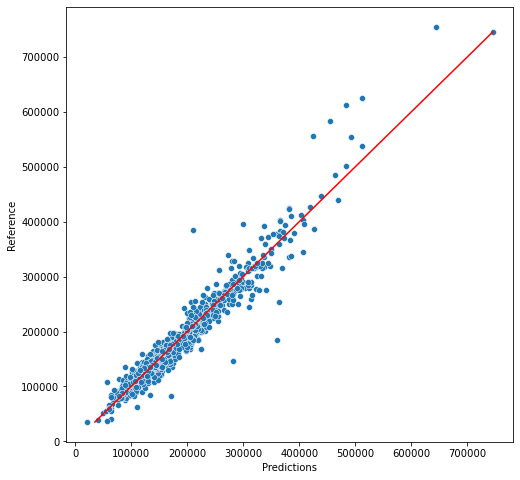

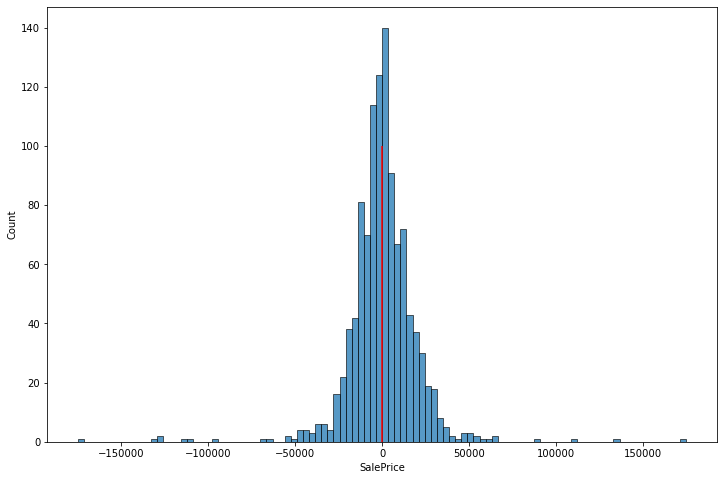

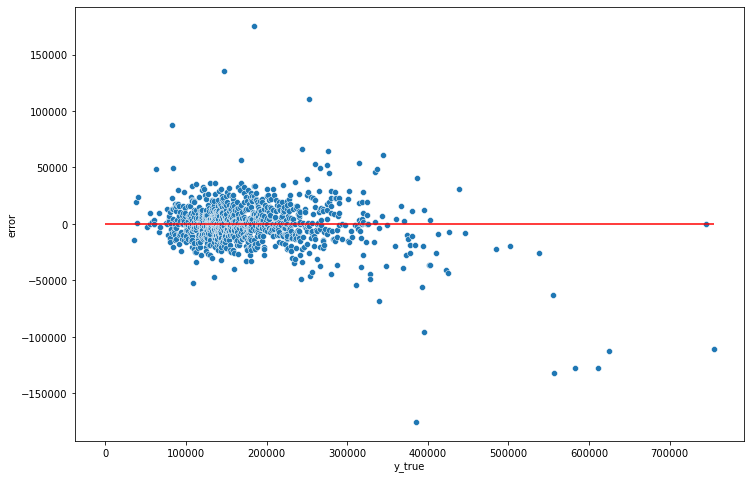

{'mse': 413642009.1032198,
 'rmse': 20338.190900451784,
 'mae': 12651.700353788277,
 'mape': 0.0740105909622197}

In [24]:
preds = search_result.predict(X_train)
plot_predictions(y_train, preds)

## Predicton Test Set

In [28]:
X_test["SalePrice"] = search_result.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [9, 14, 26, 29] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [30]:
result = X_test["SalePrice"]
result.to_csv("../data/predictions/reg-result.csv", index_label="Id")